# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [3]:
df = pd.read_csv("data\customer_segmentation.csv")
print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Plotting Distributions

<Axes: title={'center': 'Distribution of Education Levels'}>

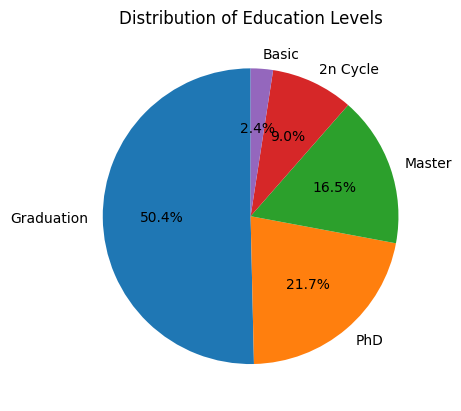

In [ ]:
df['Education'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90, 
    ylabel='',          
    title='Distribution of Education Levels'
)

<Axes: title={'center': 'Distribution of Marital Status'}, xlabel='Marital Status', ylabel='Count'>

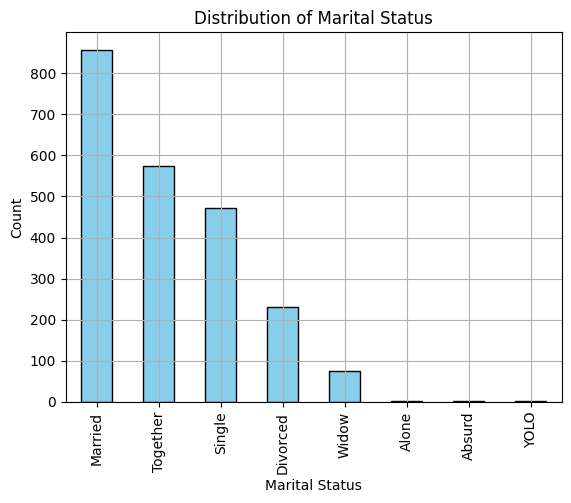

In [18]:
df['Marital_Status'].value_counts().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    grid=True,
    title='Distribution of Marital Status',
    xlabel='Marital Status',
    ylabel='Count'
)

# Feature Engineering

In [19]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [20]:
df['Age'] = 2025 - df['Year_Birth']

In [21]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60


In [23]:
df['Total_children'] = df['Kidhome'] + df['Teenhome']
df['Total_children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_children, Length: 2216, dtype: int64

In [25]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children'],
      dtype='object')

In [26]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [28]:
df['Total_Spendings'] = df[spend_cols].sum(axis=1)
df['Total_Spendings']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spendings, Length: 2216, dtype: int64

In [30]:
df['Customer_Science'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days
df['Customer_Science']

0       4864
1       4314
2       4513
3       4340
4       4362
        ... 
2235    4582
2236    4220
2237    4356
2238    4357
2239    4823
Name: Customer_Science, Length: 2216, dtype: int64

# EDA

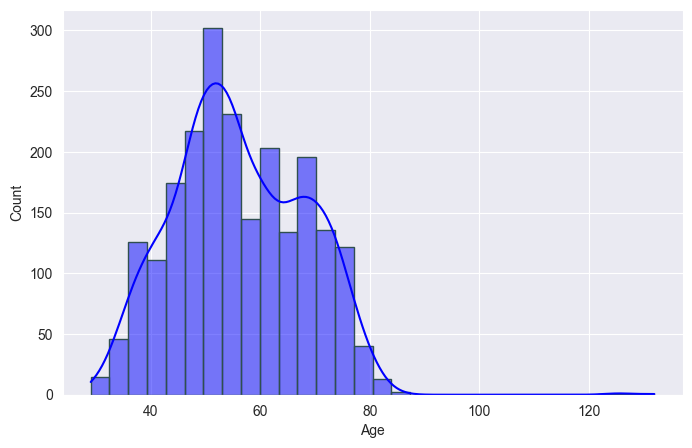

In [ ]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.histplot(df['Age'],
            kde=True,
            color='blue',
            edgecolor='darkslategray',
            bins=30,)
plt.xlabel='Age'
plt.ylabel='Count'
plt.show()

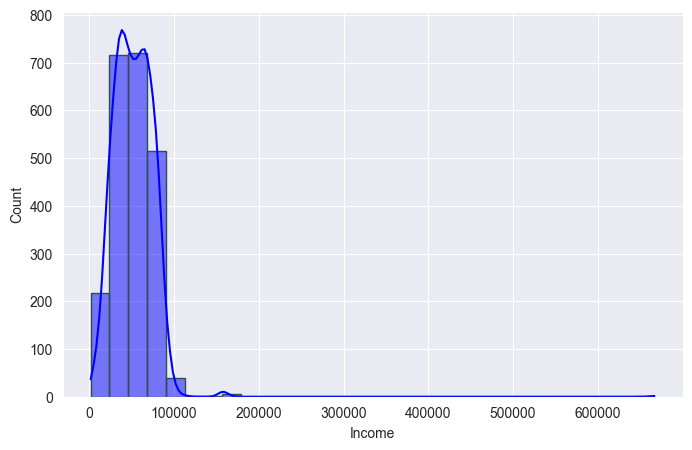

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income'],
            kde=True,
            color='blue',
            edgecolor='darkslategray',
            bins=30,)
plt.xlabel='Income'
plt.ylabel='Count'
plt.show()

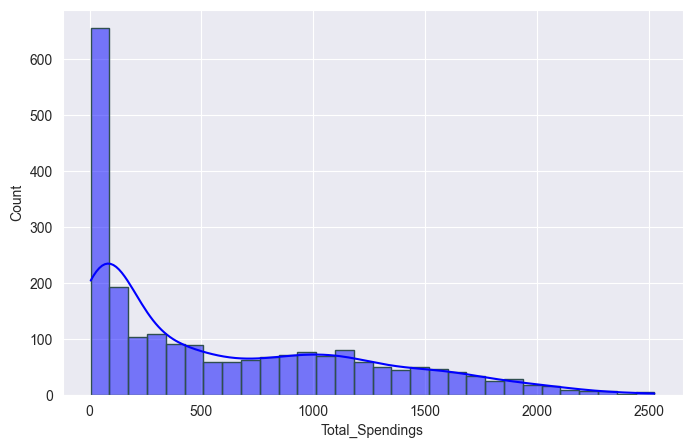

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Spendings'],
            kde=True,
            color='blue',
            edgecolor='darkslategray',
            bins=30,)
plt.xlabel='Total_Spendings'
plt.ylabel='Count'
plt.show()

In [61]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_Spendings', 'Customer_Science'],
      dtype='object')

C:\Users\junai\AppData\Local\Temp\ipykernel_11024\1469090692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Education', y="Income",palette="Set2", showmeans=True)


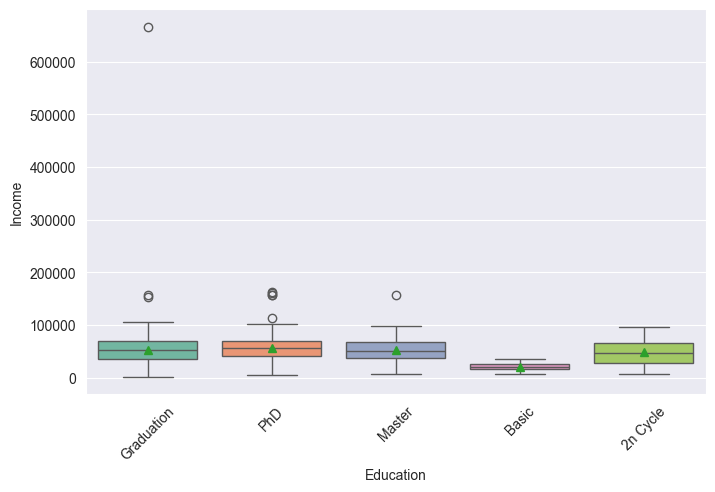

In [70]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Education', y="Income",palette="Set2", showmeans=True)
plt.xticks(rotation=45)
plt.show()

C:\Users\junai\AppData\Local\Temp\ipykernel_11024\3035966249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Marital_Status', y="Total_Spendings",palette="Set2", showmeans=True)


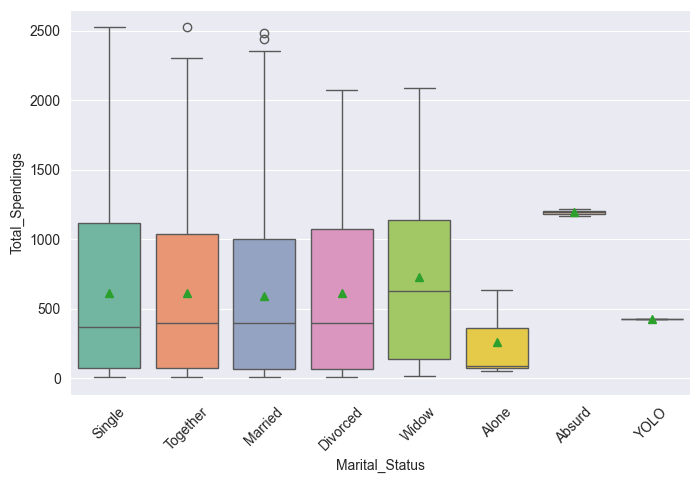

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Marital_Status', y="Total_Spendings",palette="Set2", showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [76]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_Spendings', 'Customer_Science'],
      dtype='object')

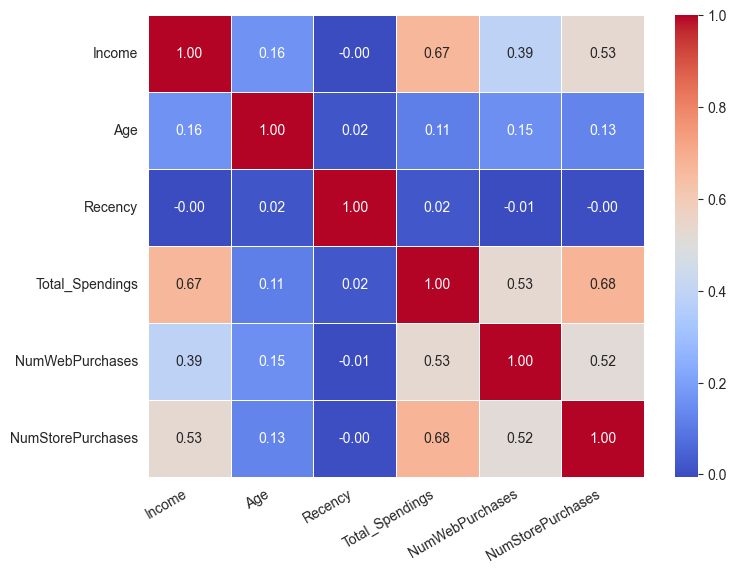

In [118]:
relation = df[['Income', 'Age', 'Recency', 'Total_Spendings', 'NumWebPurchases', 'NumStorePurchases']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(relation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=30, ha='right')
plt.show()



In [116]:
grouped=df.groupby(['Education', 'Marital_Status'])['Income'].mean().reset_index()

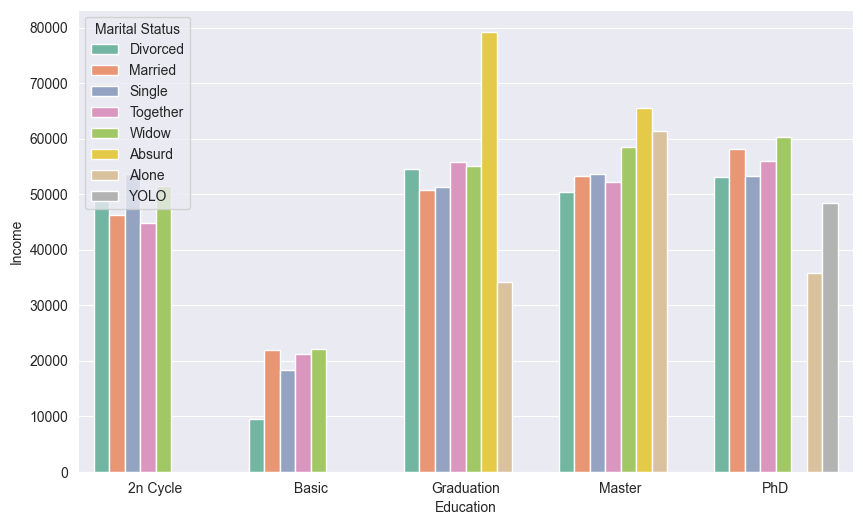

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='Education', y='Income', hue='Marital_Status', palette='Set2')
plt.legend(title="Marital Status")
plt.show()

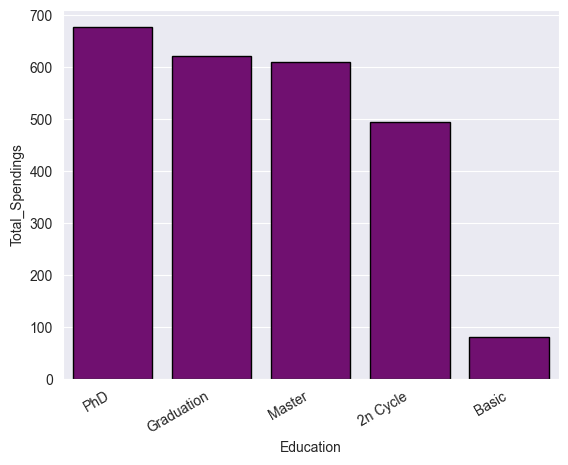

In [112]:
grouped=df.groupby('Education')['Total_Spendings'].mean().sort_values(ascending=False)
sns.barplot(data=grouped, color='purple', edgecolor='black')
plt.xticks(rotation=30, ha='right')
plt.show()

In [119]:
df['AcceptedAny'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

In [120]:
df['AcceptedAny'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [121]:
df['AcceptedAny'] = df['AcceptedAny'].apply(lambda X:1 if X > 0 else 0)

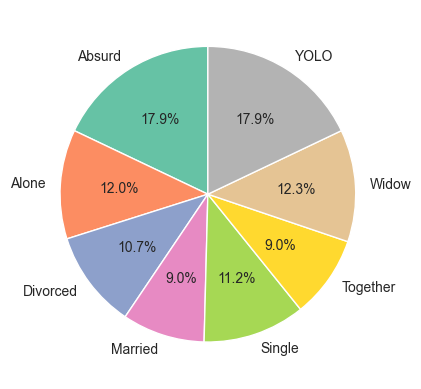

In [125]:
group2 = df.groupby('Marital_Status')['AcceptedAny'].mean()
group2.plot(
    kind='pie',
    autopct='%1.1f%%',    
    startangle=90,         
    ylabel='',             
    colormap='Set2'        
)
plt.show()

In [128]:
bins = [18,30,40,50,60,70,90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [129]:
df['AgeGroup'] = pd.cut(df['Age'], labels=labels, bins=bins)
df['AgeGroup']

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [131]:
group3 = df.groupby('AgeGroup')['Income'].mean()

C:\Users\junai\AppData\Local\Temp\ipykernel_11024\3061263347.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby('AgeGroup')['Income'].mean()


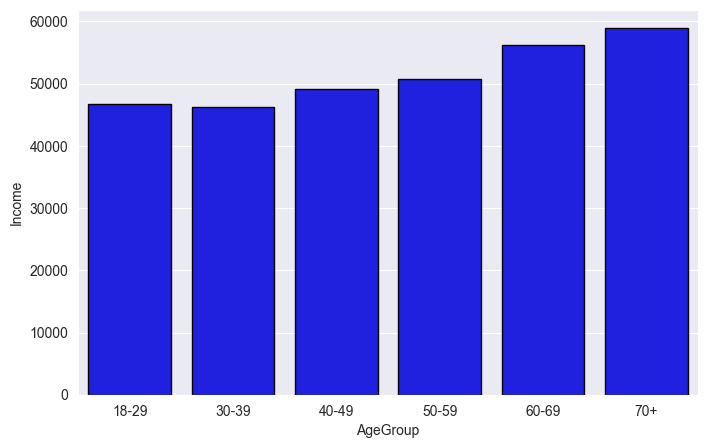

In [136]:
plt.figure(figsize=(8,5))
sns.barplot(data=group3,
            color='blue',
            edgecolor='black',)
plt.show()

In [137]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_Spendings', 'Customer_Science',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [138]:
features = ['Age', 'Income', 'Total_Spendings', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']

In [174]:
df[features].head()

,Age,Income,Total_Spendings,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94


In [139]:
X = df[features].copy()

# Model Training

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.decomposition import PCA
import joblib
import os

In [ ]:
sclaer = StandardScaler()
X_scaled = sclaer.fit_transform(X)

In [145]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',     
        n_init=30,            
        max_iter=300,         
        random_state=42,      
        tol=1e-4              
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

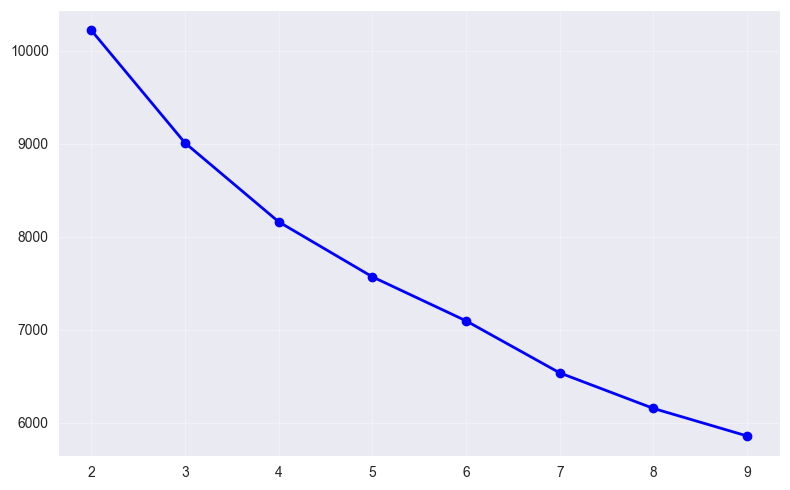

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
plt.grid(True, alpha=0.3)
plt.xticks(range(2, 10))    
plt.tight_layout()       
plt.show()

In [152]:
kl = KneeLocator(range(2, 10), wcss, curve="convex", direction="decreasing")
print("Optimal K:", kl.elbow)

Optimal K: 4


In [154]:
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=30,
    max_iter=300,
    random_state=42,
    tol=1e-4
)
df['Clusters'] = kmeans.fit_predict(X_scaled)

In [155]:
df['Clusters']

0       3
1       1
2       3
3       1
4       2
       ..
2235    3
2236    3
2237    0
2238    0
2239    1
Name: Clusters, Length: 2216, dtype: int32

In [156]:
cluster_summary = df.groupby('Clusters')[features].mean()
cluster_summary

,Age,Income,Total_Spendings,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Clusters,,,,,,,
0,56.914237,77182.814751,1270.509434,4.409949,8.430532,2.411664,51.512864
1,52.663748,34849.970228,122.376532,2.250438,3.388792,6.450088,23.901926
2,55.266667,36378.562162,134.558559,2.392793,3.459459,6.448649,74.801802
3,60.293886,60538.250493,907.327416,7.631164,8.057199,6.151874,46.187377


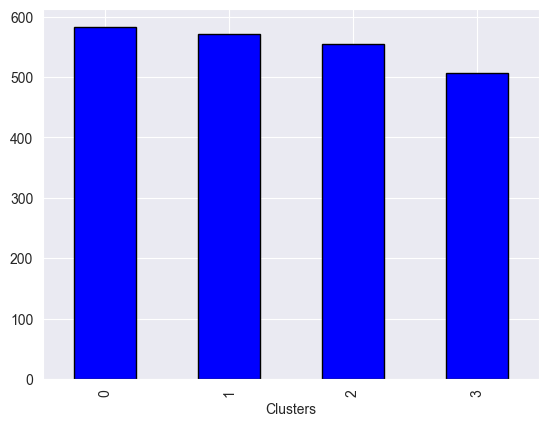

In [157]:
df['Clusters'].value_counts().plot(kind='bar', color='blue',
            edgecolor='black')
plt.show()

In [159]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = pca_data[:,0], pca_data[:,1]

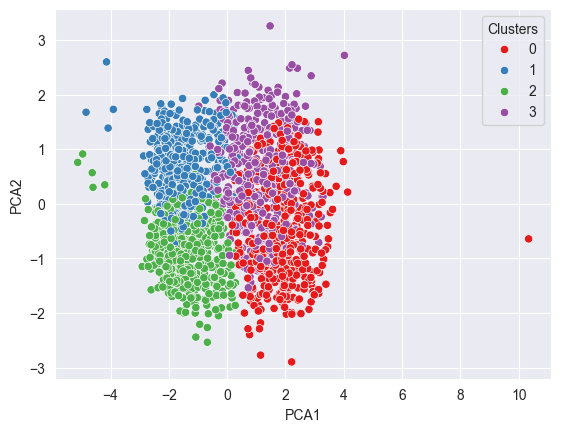

In [167]:
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Clusters', palette='Set1')
plt.show()

# Saving the files

In [173]:
os.makedirs('artifacts')
joblib.dump(kmeans, 'artifacts/kmeans.pkl')
joblib.dump(sclaer, 'artifacts/scaler.pkl')
print('Files saved succesfully')

Files saved succesfully


Cluster Name

0
High-Value Loyal Shoppers : 
High income, high spending, prefers in-store, moderate recency.

1
Budget-Conscious Occasional Shoppers : 
Low income, low spending, browses web a lot, very recent purchase (low recency).

2
Mid-Tier Engaged Browsers : 
Mid income, low spending, browses web a lot, least recent purchase (high recency).

3
Active Online-Focused Shoppers : 
High income, high spending, highest web purchases, active across all channels.